# Backfield Tutorial

Welcome to the backfield tutorial. I will now guide you through the process of creating backfield measurements. We will quickly touch on importing RockPy on your system and adding samples. so first things first.

## importing RockPy

first thing we have to do is import RockPy and get the plotting interface to actually display all plots inside of this notebook.


We need to import a few python packages for everything to work. Dont worry about them, if need be, the functions will be explained.

In [ ]:
import sys
import os.path

In [ ]:
%matplotlib inline

In [ ]:
import Rockpy

If this does not work - and you get and ``'ImportError: No module named Rockpy'`` message - you need to place the RockPy path into the ``PYTHONPATH`` variable of your system. For a permanent solution, please ask you system administrator or Google. A temporary fix is presented in the next few lines.
First find your RockPy path:

In [11]:
home = os.path.expanduser('~')
RockPy_path = os.path.join(home, 'PycharmProjects')

After you found the path and changed ``PycharmProject`` to the folder where you have stored your RockPy version, you can add the path manually. 
As mentioned before you may not need to do this, if RockPy is properly installed, everything should work out of the box.

In [12]:
sys.path.append(RockPy_path)
import RockPy

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Now we can make a sample. the sample that we will be using has been measured at the vftb. It consists of pure iron, therefore it should saturate easily. It's mass was 29mg, so we can specify the mass, too.

Keep in mind, the default units in a sample are 'mm' and 'kg', if you used a different one, you have to use mass_unit and length_unit

In [13]:
Sample = RockPy.Sample(name='iron', mass = 29.0, mass_unit ='mg')

2015-04-17 12:10:37,963: INFO       RockPy.Structure.sample CREATING	 new sample << iron >>
INFO:RockPy.Structure.sample:CREATING	 new sample << iron >>
2015-04-17 12:10:37,964: INFO       RockPy.Structure.sample  ADDING	 << measurement >> mass
INFO:RockPy.Structure.sample: ADDING	 << measurement >> mass


After the sample is created, we can add the backfield measurement. The file is again located in RockPy.test_data_path

In [14]:
vftb_file = os.path.join(RockPy.test_data_path, 'vftb', 'MUCVFTB_test.coe')

Now that we have the location of the file, we can add it. When adding a measurement you have to specify 3 things.

1. ``mtype``: this is the type of measurement, in this case it is 'backfield'
2. ``machine``: this is the machine or file format, in this case 'vftb':
3. ``mfile``: the location of your file on your harddisk. You can simply copy paste the folder if you want, or do it the way we have been doing in [5] using the builtin methods of ``os.path.join``

NOTE:   ``machine`` will be renamend to file_format

In [15]:
Coe = Sample.add_measurement(mtype='backfield', machine='vftb', mfile=vftb_file)

2015-04-17 12:10:38,109: INFO       RockPy.Structure.sample  ADDING	 << measurement >> backfield
INFO:RockPy.Structure.sample: ADDING	 << measurement >> backfield
2015-04-17 12:10:38,114: INFO       RockPy.MEASUREMENT   IMPORTING << vftb , backfield >> data
INFO:RockPy.MEASUREMENT:IMPORTING << vftb , backfield >> data
2015-04-17 12:10:38,116: INFO       RockPy.READIN        IMPORTING << iron , Vftb >> file: << /Users/mike/PycharmProjects/RockPy/Tutorials/test_data/vftb/MUCVFTB_test.coe >>
INFO:RockPy.READIN:IMPORTING << iron , Vftb >> file: << /Users/mike/PycharmProjects/RockPy/Tutorials/test_data/vftb/MUCVFTB_test.coe >>


 The sample now has two measurements.
 
 1. the mass that we added when we created the sample
 2. the backfield measurement that we added just now.
 
 ### Plotting the data
 We can now look at the data. The easiest and most basic way is to just use ``THE_MEASUEMENT.plt_mtype`` 
 where ``THE_MEASUREMENT`` is the measurement instance and ``plt_mtype`` is specific for the type of measurement, here ``plt_backfield``

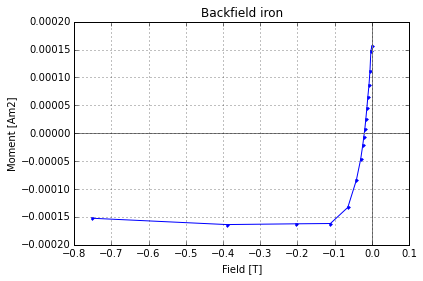

In [16]:
Coe.plt_backfield()

Thats it, you have a plot of the backfield curve. 

## Results
We can now start to look at the different values that we can calculate from the data. You can check them by typing. this gives you all the results you can calculate at this stage of development. 

Note: Since this is an early alpha version, you have to be careful and should at least visually confirm the results.

In [1]:
print Coe.result_methods

NameError: name 'Coe' is not defined

This can be used on any meassurement. Depending on the measurement there will be more (e.g. Thellier) or fewer possibilities for results (e.g. viscosity).

Generally a result can be accessed by typing ``YOUR_MEASUREMENT.result_THE-RESULT-YOU-WANT``. As an example let us calculate `bcr`, the coercivity of remanence

Note: Since a sample can have multiple measurements, some of the results may give ``nan`` if the corresponding measurement couldnt be found. ``nan`` in this case means it hasn't been calculated or can not be calculated. 


In [18]:
print Coe.result_bcr()

2015-04-17 12:10:40,066: INFO       RockPy.MEASUREMENT.Backfield CALCULATING << Bcr >> parameter from linear interpolation
INFO:RockPy.MEASUREMENT.Backfield:CALCULATING << Bcr >> parameter from linear interpolation
2015-04-17 12:10:40,067: INFO       RockPy.MEASUREMENT.Backfield                ---    If sample is not saturated, value could be too low
INFO:RockPy.MEASUREMENT.Backfield:               ---    If sample is not saturated, value could be too low


  row_name        bcr
----------  ---------
         0  2.023e-02


Every result returns a ``RockPyData`` object. These are basically tables with rows and columns, the columns have names, in this case bcr. The columns can be accessed by typing ``RockPyData['column_name']``. This however returns a new ``RockPyData`` object with only one column.

Each column in ``RockPyData`` consitst of value (for each row), error (for each row) and unit (only one). They can be accessed by using the ``RockPyData[column_name].v``, ``RockPyData[column_name].e`` and ``RockPyData[column_name].u`` respectively. 

Note: *for more information see ``RockPyData`` tutorial*